In [1]:
from corre import *

Use scipy logsumexp().


In [2]:
path = "../2yrdata/"
cci=pd.read_csv(path+'two_years_cci.csv',index_col = "date").drop(["Alaska","Hawaii"],axis=1)
cmi=pd.read_csv(path+'two_years_cmi.csv',index_col = "date")
daily = pd.read_csv(path+"two_year_daily.csv",index_col="date").drop(["Alaska","Hawaii"],axis=1)
ern = pd.read_csv(path+"ern.csv",index_col="date")
ave = daily.mean(axis=1)

In [36]:
cp_ind = [74,315,448,603]

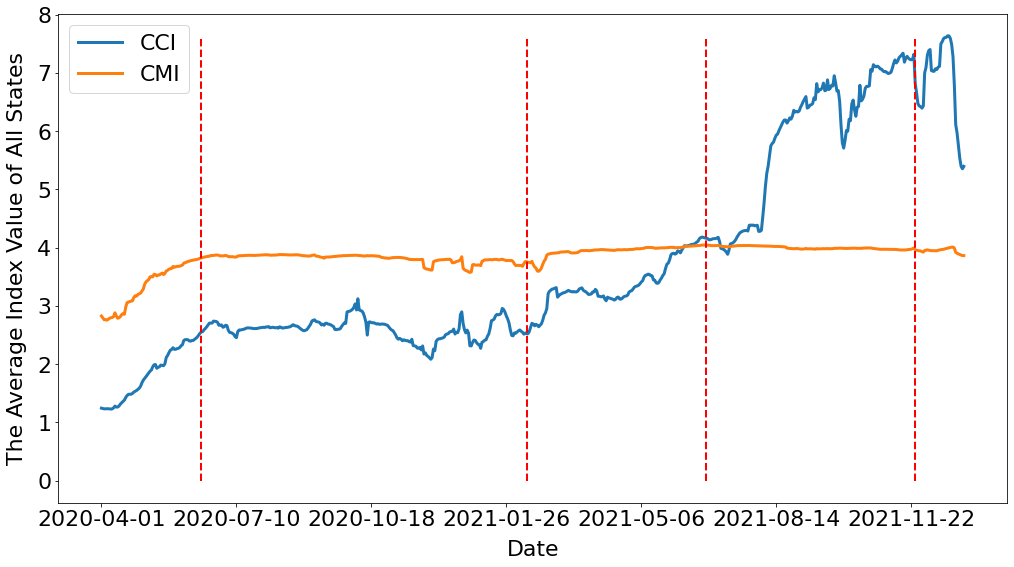

In [51]:
fig, ax = plt.subplots(figsize=[17,9])
ci_mean = cci.mean(axis=1)["2020-04-01":]
mi_mean = cmi.mean(axis=1)["2020-04-01":]
ax.plot(ci_mean,label="CCI",lw=3)
ax.plot(mi_mean,label="CMI",lw=3)
plt.legend(loc="upper left")
plt.xticks(ticks = np.arange(0,700,step=100),labels =ci_mean.index[np.arange(0,700,step=100)])
ax.vlines(x=cp_ind,ymin= 0, ymax = max(max(ci_mean),max(mi_mean)),colors='red', ls='--', lw=2)
plt.ylabel("The Average Index Value of All States",labelpad=10,fontsize=22)
plt.xlabel("Date",labelpad=10,fontsize=22)
plt.savefig("../results/2yr/index.pdf",dpi=300,bbox_inches="tight")

In [26]:
cci.mean(axis=1)["2021-06-23":"2021-11-25"].head(100)


date
2021-06-23    4.161837
2021-06-24    4.156939
2021-06-25    4.135306
2021-06-26    4.133061
2021-06-27    4.140408
                ...   
2021-09-26    6.950000
2021-09-27    6.831224
2021-09-28    6.685102
2021-09-29    6.693265
2021-09-30    6.511020
Length: 100, dtype: float64

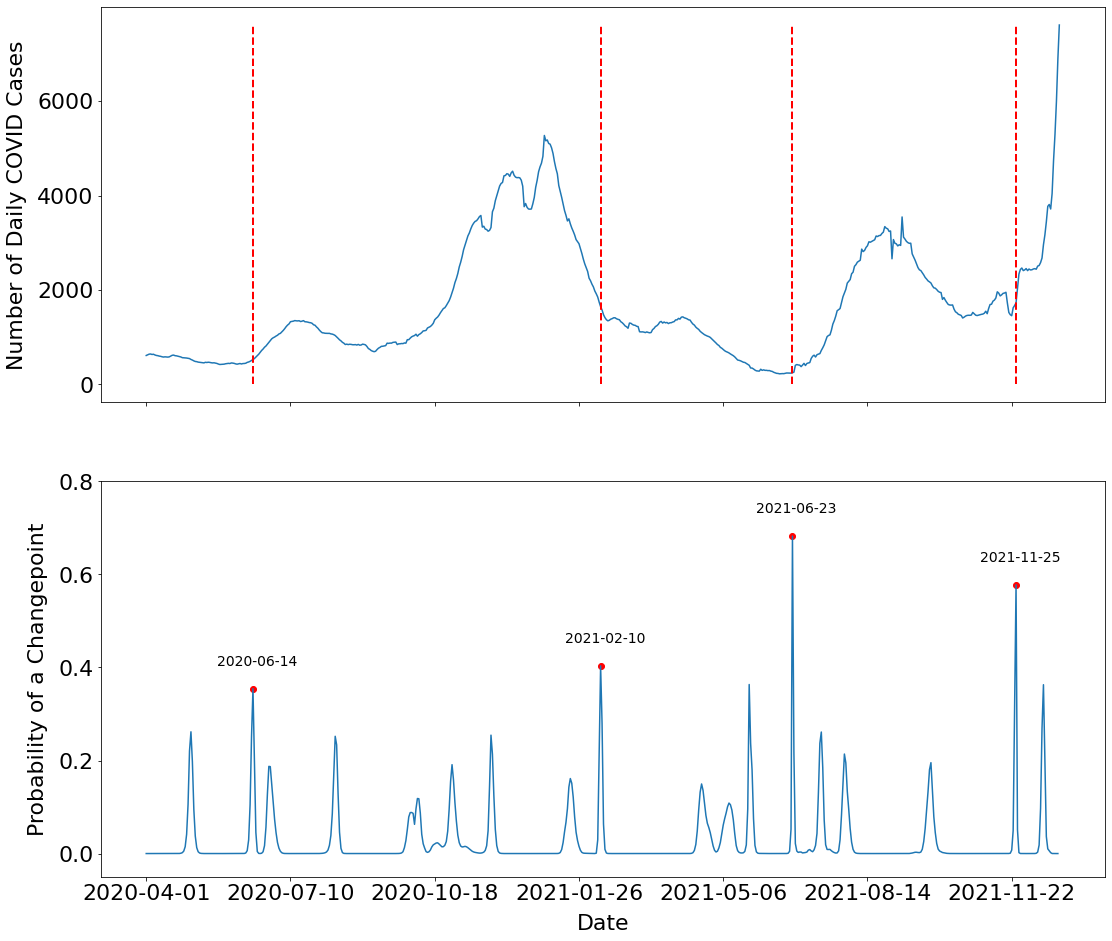

In [3]:
cp = changepoint_ind(ave,True)

In [4]:
cp

['2020-06-14', '2021-02-10', '2021-06-23', '2021-11-25']

In [5]:
#cp = list(cp[[1,8,12,16]])

TypeError: list indices must be integers or slices, not list

In [3]:
cp=['2020-06-14', '2021-02-10', '2021-06-23', '2021-11-25']

In [4]:
s = "2020-04-06"
e = "2021-12-21"

In [17]:
#ern[5:-10].to_csv("../2yrdata/ern.csv",index_label="date")

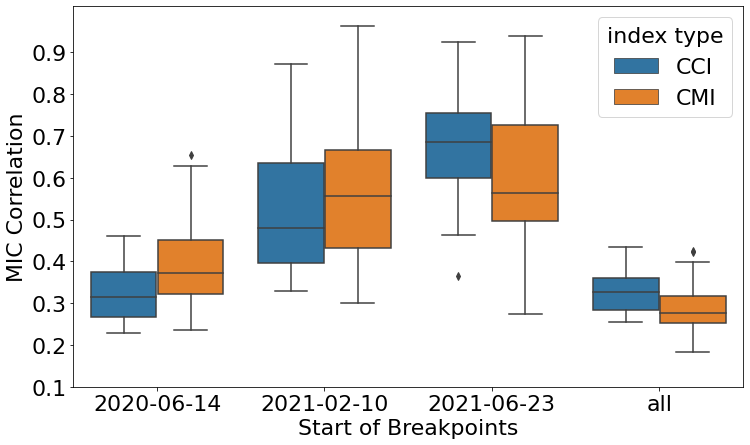

In [5]:
c_df = mic_boxplot(cp,cci[s:e],cmi[s:e],ern,glob=True,fname="global_ern_temporal_boxplot.pdf")

In [14]:
ave["2021-11-25":].max(axis=0)

11561.897959183674

In [15]:
ave.max(axis=0)

11561.897959183674

In [7]:
c_df.groupby("idx_type").describe()


2020-06-14                                                    \
              count      mean       std       min       25%       50%   
idx_type                                                                
CCI            49.0  0.324883  0.064213  0.227633  0.265750  0.314906   
CMI            49.0  0.399642  0.105312  0.235773  0.322519  0.371593   

                             2021-02-10            ... 2021-06-23            \
               75%       max      count      mean  ...        75%       max   
idx_type                                           ...                        
CCI       0.373950  0.460965       49.0  0.519658  ...   0.753868  0.924819   
CMI       0.451424  0.654729       49.0  0.552763  ...   0.727096  0.939096   

           all                                                              \
         count      mean       std       min       25%       50%       75%   
idx_type                                                                     
CCI       49.0  0.326176  0.048983  0.255320  0.284341  0.326202  0.360046   
CMI       49.0  0.283597  0.057985  0.183945  0.252191  0.276728  0.317397   

                    
               max  
idx_type            
CCI       0.434633  
CMI       0.425309  

[2 rows x 32 columns]

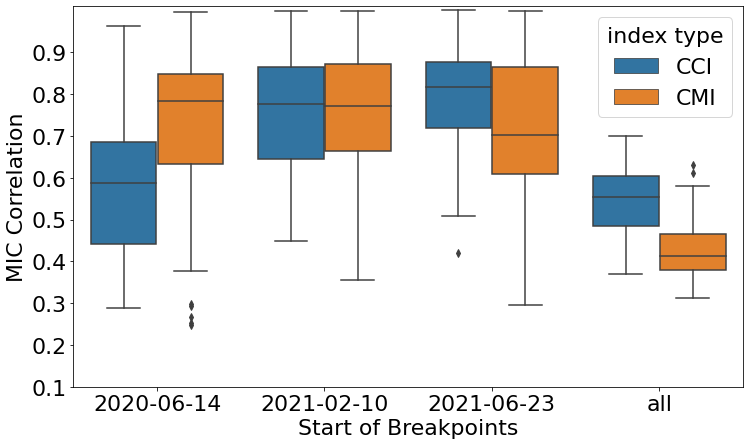

In [4]:
mic_boxplot(cp,cci,cmi,daily,glob=True,fname="global_daily_temporal_boxplot.pdf")